In [1]:
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.model_selection import KFold

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#kmer1
fs1Train = ["/content/drive/My Drive/Pattern project training/pattern/data/converted/A.thaliana5289_pos/combined/Kmer1/A.thaliana5289indep_pos_kmer_1.npy",
                   "/content/drive/My Drive/Pattern project training/pattern/data/converted/A.thaliana5289_neg/concated result/concated kmer1/A.thaliana5289_neg_kmr1.npy"]
fs1Test = ["/content/drive/My Drive/Pattern project training/pattern/npy/A.thaliana1000indep_pos_kmer_1.npy", 
                  "/content/drive/My Drive/Pattern project training/pattern/npy/A.thaliana1000indep_neg_kmer_1.npy"]


#enac
fs2Train = ["/content/drive/My Drive/Pattern project training/pattern/data/converted/A.thaliana5289_pos/combined/ENAC/A.thaliana5289indep_pos_ENAC.npy",
                   "/content/drive/My Drive/Pattern project training/pattern/data/converted/A.thaliana5289_neg/concated result/concated enac/A.thaliana5289_neg_ENAC.npy"]
fs2Test = ["/content/drive/My Drive/Pattern project training/pattern/npy/A.thaliana1000indep_pos_ENAC.npy", 
                  "/content/drive/My Drive/Pattern project training/pattern/npy/A.thaliana1000indep_neg_enac.npy"]

In [8]:
kmer1_pos_5289 = fs1Train[0]
kmer1_neg_5289 = fs1Train[1]
kmer1_pos_1000 = fs1Test[0]
kmer1_neg_1000 = fs1Test[1]


enac_pos_5289 = fs2Train[0]
enac_neg_5289 = fs2Train[1]
enac_pos_1000 = fs2Test[0]
enac_neg_1000 = fs2Test[1]




x_train_pos = np.concatenate((np.load(kmer1_pos_5289),np.load(enac_pos_5289)),axis=1) 
x_train_neg = np.concatenate((np.load(kmer1_neg_5289),np.load(enac_neg_5289)),axis=1) 
x_test_pos = np.concatenate((np.load(kmer1_pos_1000),np.load(enac_pos_1000)),axis=1)  
x_test_neg = np.concatenate((np.load(kmer1_neg_1000),np.load(enac_neg_1000)),axis=1)  

y_train_pos = np.tile(1, 5289) 
y_train_neg = np.tile(0, 5289) 
y_test_pos = np.tile(1, 1000) 
y_test_neg = np.tile(0, 1000) 

In [9]:
print(x_train_pos.shape)
print(x_train_neg.shape)
print(x_test_pos.shape)
print(x_test_neg.shape)

print(y_train_pos.shape)
print(y_train_neg.shape)
print(y_test_pos.shape)
print(y_test_neg.shape)

(5289, 152)
(5289, 152)
(1000, 152)
(1000, 152)
(5289,)
(5289,)
(1000,)
(1000,)


In [10]:
seed = 40
np.random.seed(seed)

In [11]:
x_training = np.concatenate((x_train_pos, x_train_neg), axis= 0)
y_training = np.concatenate((y_train_pos, y_train_neg))

In [12]:
x_test = np.concatenate((x_test_pos, x_test_neg))
y_test = np.concatenate((y_test_pos, y_test_neg))

In [13]:
print(x_test.shape)
print(y_test.shape)

(2000, 152)
(2000,)


In [14]:
print(x_training.shape)
print(y_training.shape)

(10578, 152)
(10578,)


In [15]:
kf = KFold(n_splits=5, random_state=seed)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [16]:
j=100
n_list=[]
n_test_avg =[]
n_train_avg = []
n_val_avg = [] 
while j <= 1000:
  n = j
  sumTrain = sumVal = sumTest =  0
  print(f"RFC: kmer1+enac  |   n = {n}")
  clf = RandomForestClassifier(n_estimators = n, random_state=seed)

  val_accuracy_list = []
  train_accuracy_list = []
  test_accuracy_list = []
  n = 1
  for train_index, val_index in kf.split(x_training):
      print("Fold : ",n)
      X_train, X_val = x_training[train_index], x_training[val_index]
      y_train, y_val = y_training[train_index], y_training[val_index]
      
      clf.fit(X_train, y_train)

      y_val_pred = clf.predict(X_val)
      val_accuracy = accuracy_score(y_val, y_val_pred)
      val_accuracy_list.append(val_accuracy)

      y_train_pred = clf.predict(X_train)
      train_accuracy = accuracy_score(y_train, y_train_pred)
      train_accuracy_list.append(train_accuracy)

      y_test_pred = clf.predict(x_test)
      test_accuracy = accuracy_score(y_test, y_test_pred)
      test_accuracy_list.append(test_accuracy)

      n += 1 

  print("done")
  for i in range(0, len(train_accuracy_list)):
      print("train_accuracy : ", train_accuracy_list[i], "\tVal accuracy : ", val_accuracy_list[i], "\tTest accuracy : ", test_accuracy_list[i])
      sumTrain = sumTrain + train_accuracy_list[i]
      sumVal = sumVal + val_accuracy_list[i]
      sumTest = sumTest + test_accuracy_list[i]
  sumTrain = sumTrain/5.0
  sumVal = sumVal/5.0
  sumTest = sumTest/5.0
  print("------------------------------------------------------------------------------------------------")
  print(f"Train accuracy(avg): {sumTrain} | Val accuracy(avg): {sumVal}  | Test accuracy(avg): {sumTest}")
  print("================================================================================================")
  n_list.append(j)
  n_train_avg.append(sumTrain)
  n_val_avg.append(sumVal)
  n_test_avg.append(sumTest)
  j = j+50

RFC: kmer1+enac  |   n = 100
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
done
train_accuracy :  1.0 	Val accuracy :  0.33506616257088845 	Test accuracy :  0.6005
train_accuracy :  1.0 	Val accuracy :  0.5444234404536862 	Test accuracy :  0.6745
train_accuracy :  1.0 	Val accuracy :  0.72117202268431 	Test accuracy :  0.7995
train_accuracy :  1.0 	Val accuracy :  0.8732860520094563 	Test accuracy :  0.7225
train_accuracy :  1.0 	Val accuracy :  0.46335697399527187 	Test accuracy :  0.571
------------------------------------------------------------------------------------------------
Train accuracy(avg): 1.0 | Val accuracy(avg): 0.5874609303427226  | Test accuracy(avg): 0.6736000000000001
RFC: kmer1+enac  |   n = 150
Fold :  1
Fold :  2
Fold :  3
Fold :  4
Fold :  5
done
train_accuracy :  1.0 	Val accuracy :  0.35255198487712663 	Test accuracy :  0.608
train_accuracy :  1.0 	Val accuracy :  0.525992438563327 	Test accuracy :  0.6635
train_accuracy :  1.0 	Val accuracy :  0.72542533

In [17]:
i=0  
print(" n      train      val             test")
print("===================================================================")
for x in n_list:
  print(f"{x}  -  {n_train_avg[i]} - {n_val_avg[i]} - {n_test_avg[i]}")
  print("--------------------------------------------------------------------")
  i=i+1

 n      train      val             test
100  -  1.0 - 0.5874609303427226 - 0.6736000000000001
--------------------------------------------------------------------
150  -  1.0 - 0.5888790572336403 - 0.6726
--------------------------------------------------------------------
200  -  1.0 - 0.5957795385378541 - 0.6724
--------------------------------------------------------------------
250  -  1.0 - 0.599182721312794 - 0.6712
--------------------------------------------------------------------
300  -  1.0 - 0.5974808170999298 - 0.6712
--------------------------------------------------------------------
350  -  1.0 - 0.5953069487457936 - 0.6696000000000001
--------------------------------------------------------------------
400  -  1.0 - 0.5971024771302292 - 0.6698999999999999
--------------------------------------------------------------------
450  -  1.0 - 0.598047343888956 - 0.6693
--------------------------------------------------------------------
500  -  1.0 - 0.5978583079721318 - 0.6

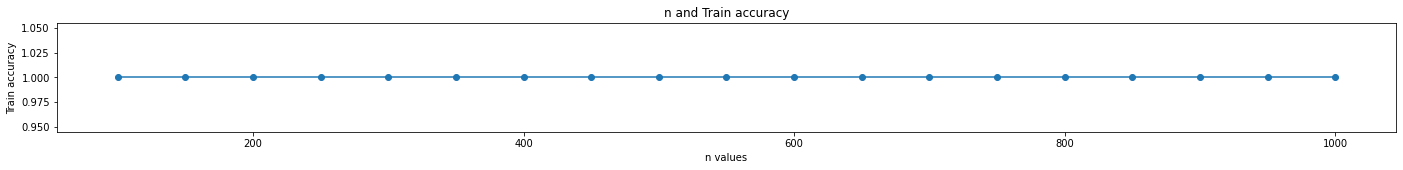

In [18]:
# Import pyplot
import matplotlib.pyplot as plt


# Define plot space
fig, ax = plt.subplots(figsize=(24, 2))

# Define x and y axes
ax.plot(n_list, 
        n_train_avg,
        marker = 'o')

# Set plot title and axes labels
ax.set(title = "n and Train accuracy",
       xlabel = "n values",
       ylabel = "Train accuracy")

plt.show()

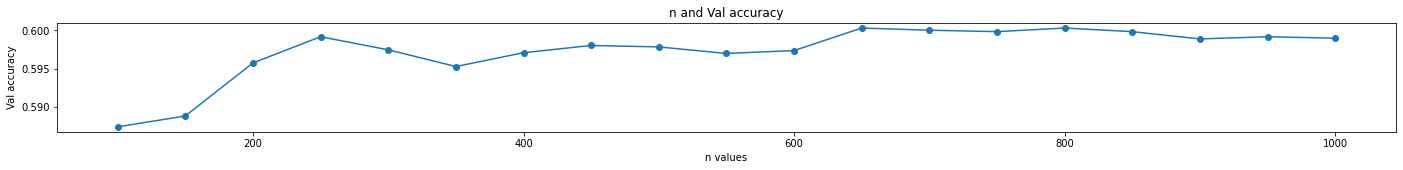

In [19]:
# Import pyplot
import matplotlib.pyplot as plt


# Define plot space
fig, ax = plt.subplots(figsize=(24, 2))

# Define x and y axes
ax.plot(n_list, 
        n_val_avg,
        marker = 'o')

# Set plot title and axes labels
ax.set(title = "n and Val accuracy",
       xlabel = "n values",
       ylabel = "Val accuracy")

plt.show()

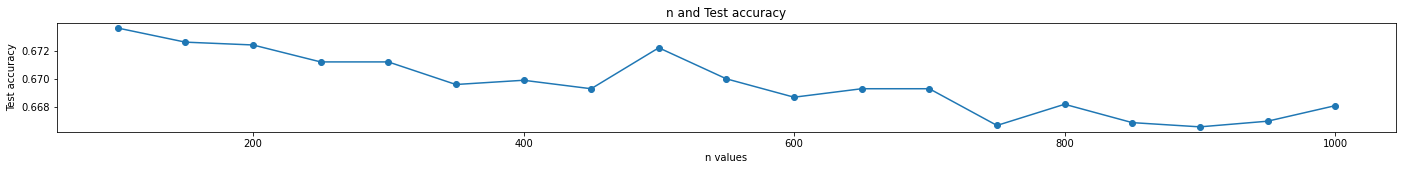

In [20]:
# Import pyplot
import matplotlib.pyplot as plt


# Define plot space
fig, ax = plt.subplots(figsize=(24, 2))

# Define x and y axes
ax.plot(n_list, 
        n_test_avg,
        marker = 'o')

# Set plot title and axes labels
ax.set(title = "n and Test accuracy",
       xlabel = "n values",
       ylabel = "Test accuracy")

plt.show()